<a href="https://colab.research.google.com/github/Suriya0306/NM-project/blob/main/NM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00


Welcome to the Social Media Sentiment and Emotion Analyzer!

Enter social media texts (type 'done' to finish):
Text: Today was amazing! I got a promotion at work, spent time with my family, and ended the day with my favorite movie. Feeling grateful and excited for the future! 
Text: I’m feeling so frustrated right now. Nothing seems to be going right today—missed my deadline, spilled coffee on my shirt, and now I just want to give up. 
Text: The weather is moderate today—not too hot, not too cold. Just another typical day, nothing special happening. 
Text: Had the best weekend ever! Went on a road trip with my friends, explored new places, and laughed until we cried. Life is beautiful!
Text: Feeling completely drained today. Work was overwhelming, my phone keeps crashing, and I just don't have the energy for anything.
Text: ust finished my daily routine. Woke up, had breakfast, worked, and now I’m winding down. Nothing extraordinary, just another day. 
Text: The sun is shining, laughte

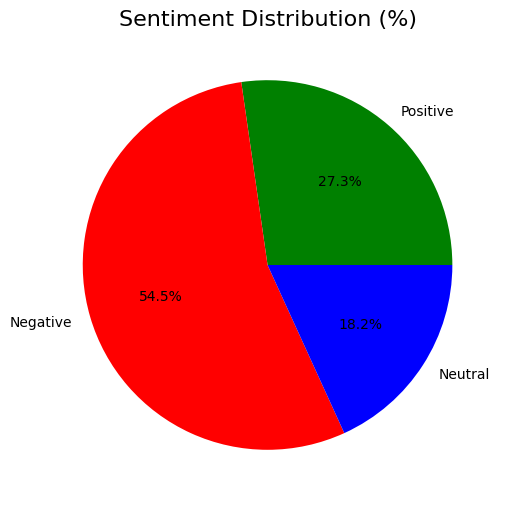

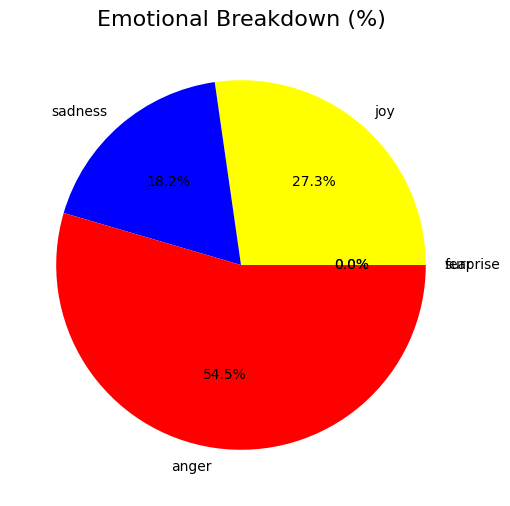

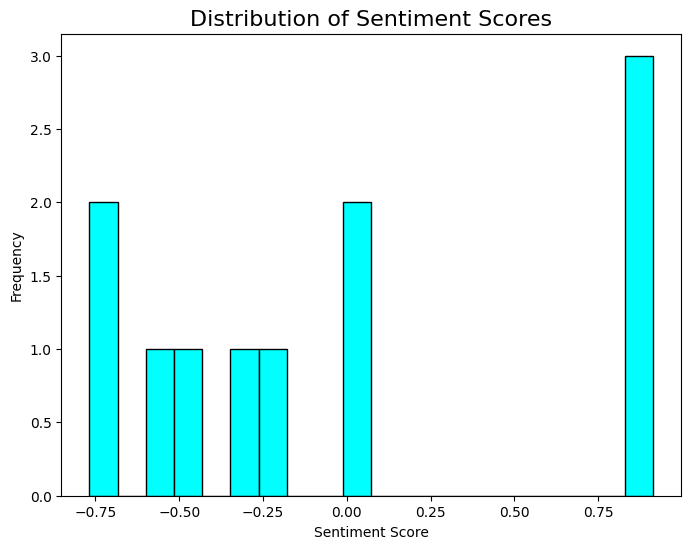

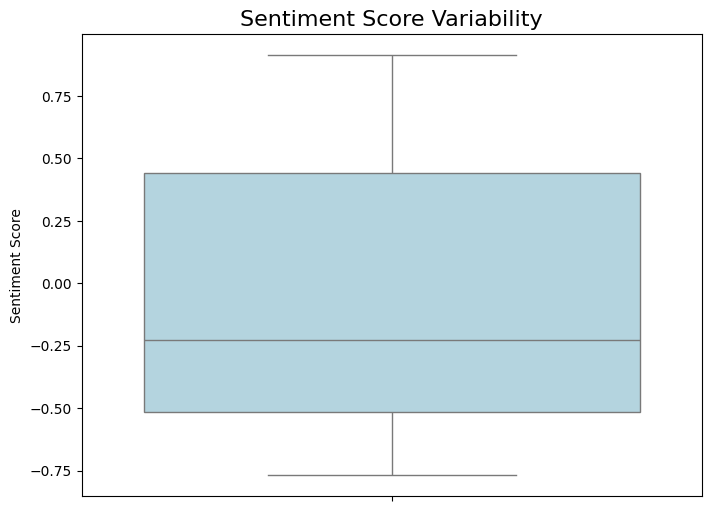

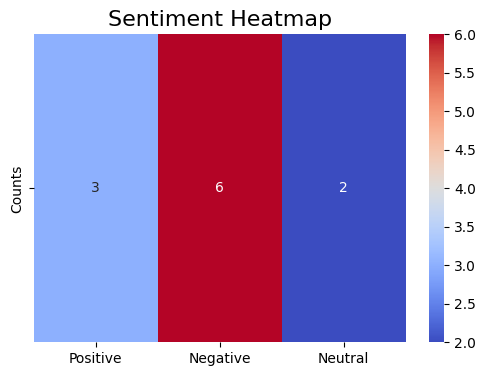

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Emoji Mapping for Sentiments
emoji_map = {
    "Positive": "😊",
    "Negative": "😠",
    "Neutral": "😐"
}

# Emotion Mapping
emotion_map = {
    "joy": "😊",
    "sadness": "😢",
    "anger": "😠",
    "fear": "😨",
    "surprise": "😮"
}

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    text = text.lower().strip()  # Convert to lowercase and remove extra spaces
    return text

# Function to process and display sentiment analysis with emotional breakdown
def analyze_texts(texts):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    emotion_counts = {"joy": 0, "sadness": 0, "anger": 0, "fear": 0, "surprise": 0}
    sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}
    compound_scores = []

    for text in texts:
        cleaned = clean_text(text)  # Preprocess text
        score = analyzer.polarity_scores(cleaned)  # Get sentiment scores
        compound = score['compound']
        compound_scores.append(compound)  # Store scores for visualization

        if compound >= 0.05:
            sentiment = 'Positive'
            emotion_counts["joy"] += 1
        elif compound <= -0.05:
            sentiment = 'Negative'
            emotion_counts["anger"] += 1
        else:
            sentiment = 'Neutral'
            emotion_counts["sadness"] += 1

        sentiment_counts[sentiment] += 1
        emoji = emoji_map[sentiment]

        results.append({
            "Original Text": text,
            "Cleaned Text": cleaned,
            "Sentiment": sentiment,
            "Compound Score": compound,
            "Emoji": emoji
        })

    # Convert results to DataFrame
    df = pd.DataFrame(results)

    # Print results
    print("\n--- Sentiment Analysis Results ---\n")
    print(df)

    # Calculate percentages
    total_texts = len(texts)
    sentiment_percentages = {k: (v / total_texts) * 100 for k, v in sentiment_counts.items()}
    emotion_percentages = {k: (v / total_texts) * 100 for k, v in emotion_counts.items()}

    # Display sentiment breakdown with percentages
    print("\n--- Sentiment Breakdown ---\n")
    for sentiment, count in sentiment_counts.items():
        percentage = sentiment_percentages[sentiment]
        print(f"{sentiment}: {count} ({percentage:.2f}%) {emoji_map[sentiment]}")

    # Display emotion breakdown with percentages
    print("\n--- Emotional Breakdown ---\n")
    for emotion, count in emotion_counts.items():
        percentage = emotion_percentages[emotion]
        print(f"{emotion.capitalize()}: {count} ({percentage:.2f}%) {emotion_map[emotion]}")

    # Visualization for Sentiment using Pie Chart
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_percentages.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
    plt.title("Sentiment Distribution (%)", fontsize=16)
    plt.show()

    # Visualization for Emotion using Pie Chart
    plt.figure(figsize=(8, 6))
    plt.pie(emotion_percentages.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'blue', 'red', 'purple', 'orange'])
    plt.title("Emotional Breakdown (%)", fontsize=16)
    plt.show()

    # Histogram of Sentiment Scores
    plt.figure(figsize=(8, 6))
    plt.hist(compound_scores, bins=20, edgecolor='black', color='cyan')
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Sentiment Scores", fontsize=16)
    plt.show()

    # Boxplot of Sentiment Scores
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=compound_scores, color='lightblue')
    plt.title("Sentiment Score Variability", fontsize=16)
    plt.ylabel("Sentiment Score")
    plt.show()

    # Heatmap of Sentiment Counts
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(sentiment_counts, index=["Counts"]), annot=True, cmap="coolwarm", fmt="d")
    plt.title("Sentiment Heatmap", fontsize=16)
    plt.show()

# Main loop for continuous input
print("Welcome to the Social Media Sentiment and Emotion Analyzer!")
while True:
    user_texts = []
    print("\nEnter social media texts (type 'done' to finish):")
    while True:
        entry = input("Text: ")
        if entry.lower() == "done":
            break
        user_texts.append(entry)

    # If no texts were entered, skip analysis
    if not user_texts:
        print("No texts entered. Returning to the main menu.")
        continue

    # Analyze the entered texts
    analyze_texts(user_texts)

    # Ask if the user wants to analyze more texts
    proceed = input("Do you want to enter more texts? (yes/no): ").strip().lower()
    if proceed != 'yes':
        print("Thank you for using the Sentiment and Emotion Analyzer. Goodbye!")
        break